# Importing Libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing Data

In [31]:
data = pd.read_csv("HR-Employee-Attrition.csv")

# Inspecting Data

In [27]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.shape

(1470, 35)

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# EDA

## Handling missing values

In [42]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Handling outliers

In [82]:
columns=data.columns
for i in columns:
    plt.boxplot(data[i])
    plt.title(i)
    plt.figure()

{'whiskers': [<matplotlib.lines.Line2D at 0x227f6219e10>,
 'caps': [<matplotlib.lines.Line2D at 0x227f611f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x227f621beb0>],
 'medians': [<matplotlib.lines.Line2D at 0x227f611ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x227f611d3f0>],
 'means': []}

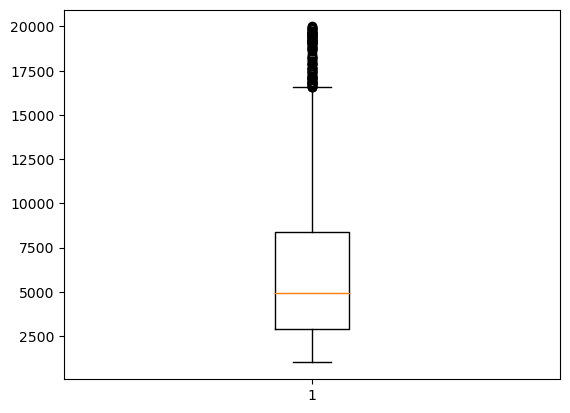

In [84]:
plt.boxplot(data['MonthlyIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227f621e410>,
 'caps': [<matplotlib.lines.Line2D at 0x227f626dae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x227f624b6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x227f626e020>],
 'fliers': [<matplotlib.lines.Line2D at 0x227f626e2c0>],
 'means': []}

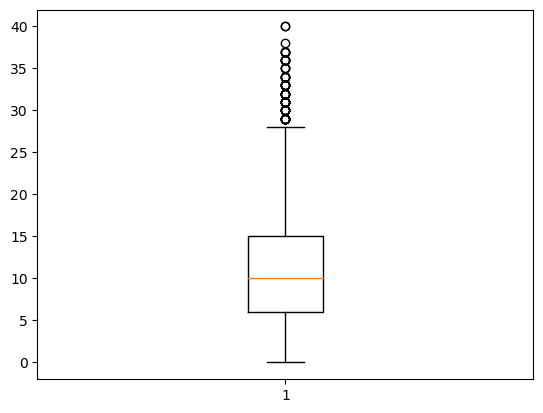

In [86]:
plt.boxplot(data['TotalWorkingYears'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227f62aece0>,
 'caps': [<matplotlib.lines.Line2D at 0x227f62ad900>,
 'boxes': [<matplotlib.lines.Line2D at 0x227f62aef80>],
 'medians': [<matplotlib.lines.Line2D at 0x227f62ad240>],
 'fliers': [<matplotlib.lines.Line2D at 0x227f62acd00>],
 'means': []}

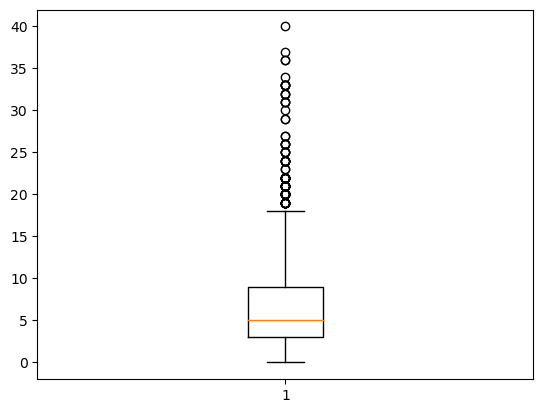

In [88]:
plt.boxplot(data['YearsAtCompany'])

In [90]:
print(f'Old shape of data: {data.shape}')

q1=data.MonthlyIncome.quantile(0.25)
q3=data.MonthlyIncome.quantile(0.75)
IQR=q3-q1
print(q1,q3,IQR)

lower = q1-1.5*IQR
upper = q3+1.5*IQR

upper_index  = np.where(data['MonthlyIncome'] >= upper)[0]
lower_index  = np.where(data['MonthlyIncome'] <= lower)[0]

data.drop(index = upper_index, inplace=True)
data.drop(index = lower_index, inplace=True)

print(f'New shape of data: {data.shape}')
data.reset_index(inplace=True)

Old shape of data: (1470, 35)
2911.0 8379.0 5468.0
New shape of data: (1356, 35)


In [92]:
print(f'Old shape of data: {data.shape}')

q1=data.TotalWorkingYears.quantile(0.25)
q3=data.TotalWorkingYears.quantile(0.75)
IQR=q3-q1
print(q1,q3,IQR)

lower = q1-1.5*IQR
upper = q3+1.5*IQR

upper_index  = np.where(data['TotalWorkingYears'] >= upper)[0]
lower_index  = np.where(data['TotalWorkingYears'] <= lower)[0]

data.drop(index = upper_index, inplace=True)
data.drop(index = lower_index, inplace=True)

print(f'New shape of data: {data.shape}')
data.reset_index(inplace=True)

Old shape of data: (1356, 36)
6.0 13.0 7.0
New shape of data: (1295, 36)


In [94]:
data.drop('level_0',axis=1,inplace=True)

In [96]:
print(f'Old shape of data: {data.shape}')

q1=data.YearsAtCompany.quantile(0.25)
q3=data.YearsAtCompany.quantile(0.75)
IQR=q3-q1
print(q1,q3,IQR)

lower = q1-1.5*IQR
upper = q3+1.5*IQR

upper_index  = np.where(data['YearsAtCompany'] >= upper)[0]
lower_index  = np.where(data['YearsAtCompany'] <= lower)[0]

data.drop(index = upper_index, inplace=True)
data.drop(index = lower_index, inplace=True)

print(f'New shape of data: {data.shape}')
data.reset_index(inplace=True)

Old shape of data: (1295, 36)
3.0 9.0 6.0
New shape of data: (1257, 36)


## Summary statistics

In [101]:
data.describe()

,level_0,index,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.0,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.0,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,646.716786,736.589499,35.139220,804.034208,9.253779,2.899761,1.0,1027.914081,2.719173,65.931583,...,2.692124,80.0,0.801114,8.801909,2.815434,2.761337,5.568815,3.750994,1.689737,3.622116
std,374.480127,429.338009,8.323985,400.847736,8.046246,1.029567,0.0,608.811354,1.088397,20.335994,...,1.081051,0.0,0.865234,4.868958,1.310534,0.711821,3.821901,3.204677,2.462295,3.130839
min,0.000000,0.000000,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,323.000000,362.000000,29.000000,470.000000,2.000000,2.000000,1.0,484.000000,2.000000,48.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,646.000000,729.000000,34.000000,805.000000,7.000000,3.000000,1.0,1014.000000,3.000000,66.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,972.000000,1115.000000,40.000000,1157.000000,14.000000,4.000000,1.0,1577.000000,4.000000,84.000000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,1294.000000,1469.000000,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,...,4.000000,80.0,3.000000,23.000000,6.000000,4.000000,17.000000,15.000000,15.000000,15.000000


## Correlation Analysis

In [104]:
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_10424\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,level_0,index,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
level_0,1.000000,0.999952,0.004624,-0.038340,0.015145,0.047370,NaN,0.999798,0.011721,0.038074,...,-0.057507,NaN,0.062252,-0.003497,0.026360,0.006971,0.010961,-0.014748,-0.003682,-0.010342
index,0.999952,1.000000,0.004791,-0.038130,0.015296,0.047474,NaN,0.999908,0.011639,0.038578,...,-0.057164,NaN,0.062422,-0.003168,0.026262,0.007034,0.011028,-0.014663,-0.003473,-0.010188
Age,0.004624,0.004791,1.000000,0.012694,0.004976,0.222457,NaN,0.005171,0.001507,0.039640,...,0.029541,NaN,0.066638,0.538589,-0.009831,-0.016425,0.133177,0.115464,0.098640,0.098254
DailyRate,-0.038340,-0.038130,0.012694,1.000000,-0.003056,-0.027431,NaN,-0.037450,0.039798,0.021419,...,0.007386,NaN,0.053379,0.044945,0.002584,-0.041885,0.007924,0.022800,-0.002513,-0.006857
DistanceFromHome,0.015145,0.015296,0.004976,-0.003056,1.000000,0.007783,NaN,0.015184,-0.027494,0.023637,...,0.019973,NaN,0.063179,0.047274,-0.037233,-0.046828,0.017904,0.019342,0.015953,0.012628
Education,0.047370,0.047474,0.222457,-0.027431,0.007783,1.000000,NaN,0.047499,-0.030114,0.009635,...,-0.004859,NaN,0.027653,0.187262,-0.023164,0.009700,0.082285,0.079541,0.074404,0.056411
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999798,0.999908,0.005171,-0.037450,0.015184,0.047499,NaN,1.000000,0.011709,0.039171,...,-0.057360,NaN,0.062233,-0.003258,0.026008,0.006493,0.011393,-0.014198,-0.003191,-0.010006
EnvironmentSatisfaction,0.011721,0.011639,0.001507,0.039798,-0.027494,-0.030114,NaN,0.011709,1.000000,-0.026049,...,0.020516,NaN,0.024343,-0.021774,-0.016272,0.026464,0.022354,0.047274,0.026583,0.009020
HourlyRate,0.038074,0.038578,0.039640,0.021419,0.023637,0.009635,NaN,0.039171,-0.026049,1.000000,...,0.013057,NaN,0.051987,0.002147,-0.007196,-0.014989,-0.051476,-0.048140,-0.068509,-0.030393


([<matplotlib.patches.Wedge at 0x227992711e0>,
 [Text(-0.36284346242211263, 1.0384337348996002, 'Female'),
  Text(0.36284336519692767, -1.0384337688714524, 'Male')])

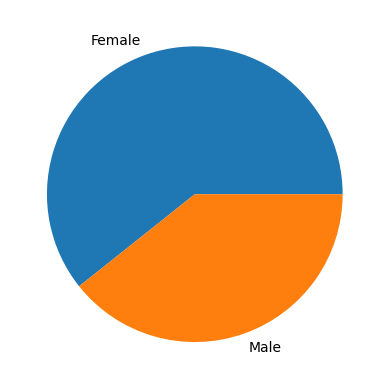

In [108]:
count = data.Gender.value_counts()
labels = data.Gender.unique()

plt.pie(x=count , labels=labels)

## Dropping useless columns

In [114]:
data.drop("index",axis=1,inplace=True)

In [116]:
data.drop('level_0',axis=1,inplace=True)

In [118]:
data.drop('EmployeeNumber',axis=1,inplace=True)#it is like index

In [120]:
data.drop("StandardHours",axis=1,inplace=True)#only one value

In [122]:
data.drop('EmployeeCount',axis=1,inplace=True)#only one value

In [124]:
data.drop('YearsInCurrentRole',axis=1,inplace=True)#ncorr

In [126]:
data.drop('YearsWithCurrManager',axis=1,inplace=True)#ncorr

In [128]:
data.drop('JobLevel',axis=1,inplace=True)#ncorr

In [130]:
data.drop('HourlyRate',axis=1,inplace=True)#ncorr

In [132]:
data.drop('DailyRate',axis=1,inplace=True)#ncorr

In [134]:
data.drop('Education',axis=1,inplace=True)#ncorr

In [136]:
data.drop('EducationField',axis=1,inplace=True)

In [138]:
data.drop('Department',axis=1,inplace=True)#

In [140]:
data.drop('JobRole',axis=1,inplace=True)#

In [142]:
data.drop('MonthlyRate',axis=1,inplace=True)#

In [144]:
data.drop('NumCompaniesWorked',axis=1,inplace=True)#

In [146]:
data.drop('OverTime',axis=1,inplace=True)#

In [148]:
data.drop('PerformanceRating',axis=1,inplace=True)#

In [150]:
data.drop('StockOptionLevel',axis=1,inplace=True)#

In [152]:
data.drop('RelationshipSatisfaction',axis=1,inplace=True)#

In [154]:
data.drop('TrainingTimesLastYear',axis=1,inplace=True)#

In [162]:
data.drop("Over18", axis=1,inplace=True)

In [164]:
data.shape

(1257, 15)

In [166]:
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,4,Single,5993,11,8,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,Married,5130,23,10,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,3,Single,2090,15,7,3,0,0
3,33,No,Travel_Frequently,3,4,Female,3,3,Married,2909,11,8,3,8,3
4,27,No,Travel_Rarely,2,1,Male,3,2,Married,3468,12,6,3,2,2


## Feature Engineering

In [168]:
le_BT = LabelEncoder()
data['BusinessTravel'] = le_BT.fit_transform(data['BusinessTravel'])

le_Gen = LabelEncoder()
data['Gender'] = le_Gen.fit_transform(data['Gender'])

le_Marst = LabelEncoder()
data['MaritalStatus'] = le_Marst.fit_transform(data['MaritalStatus'])

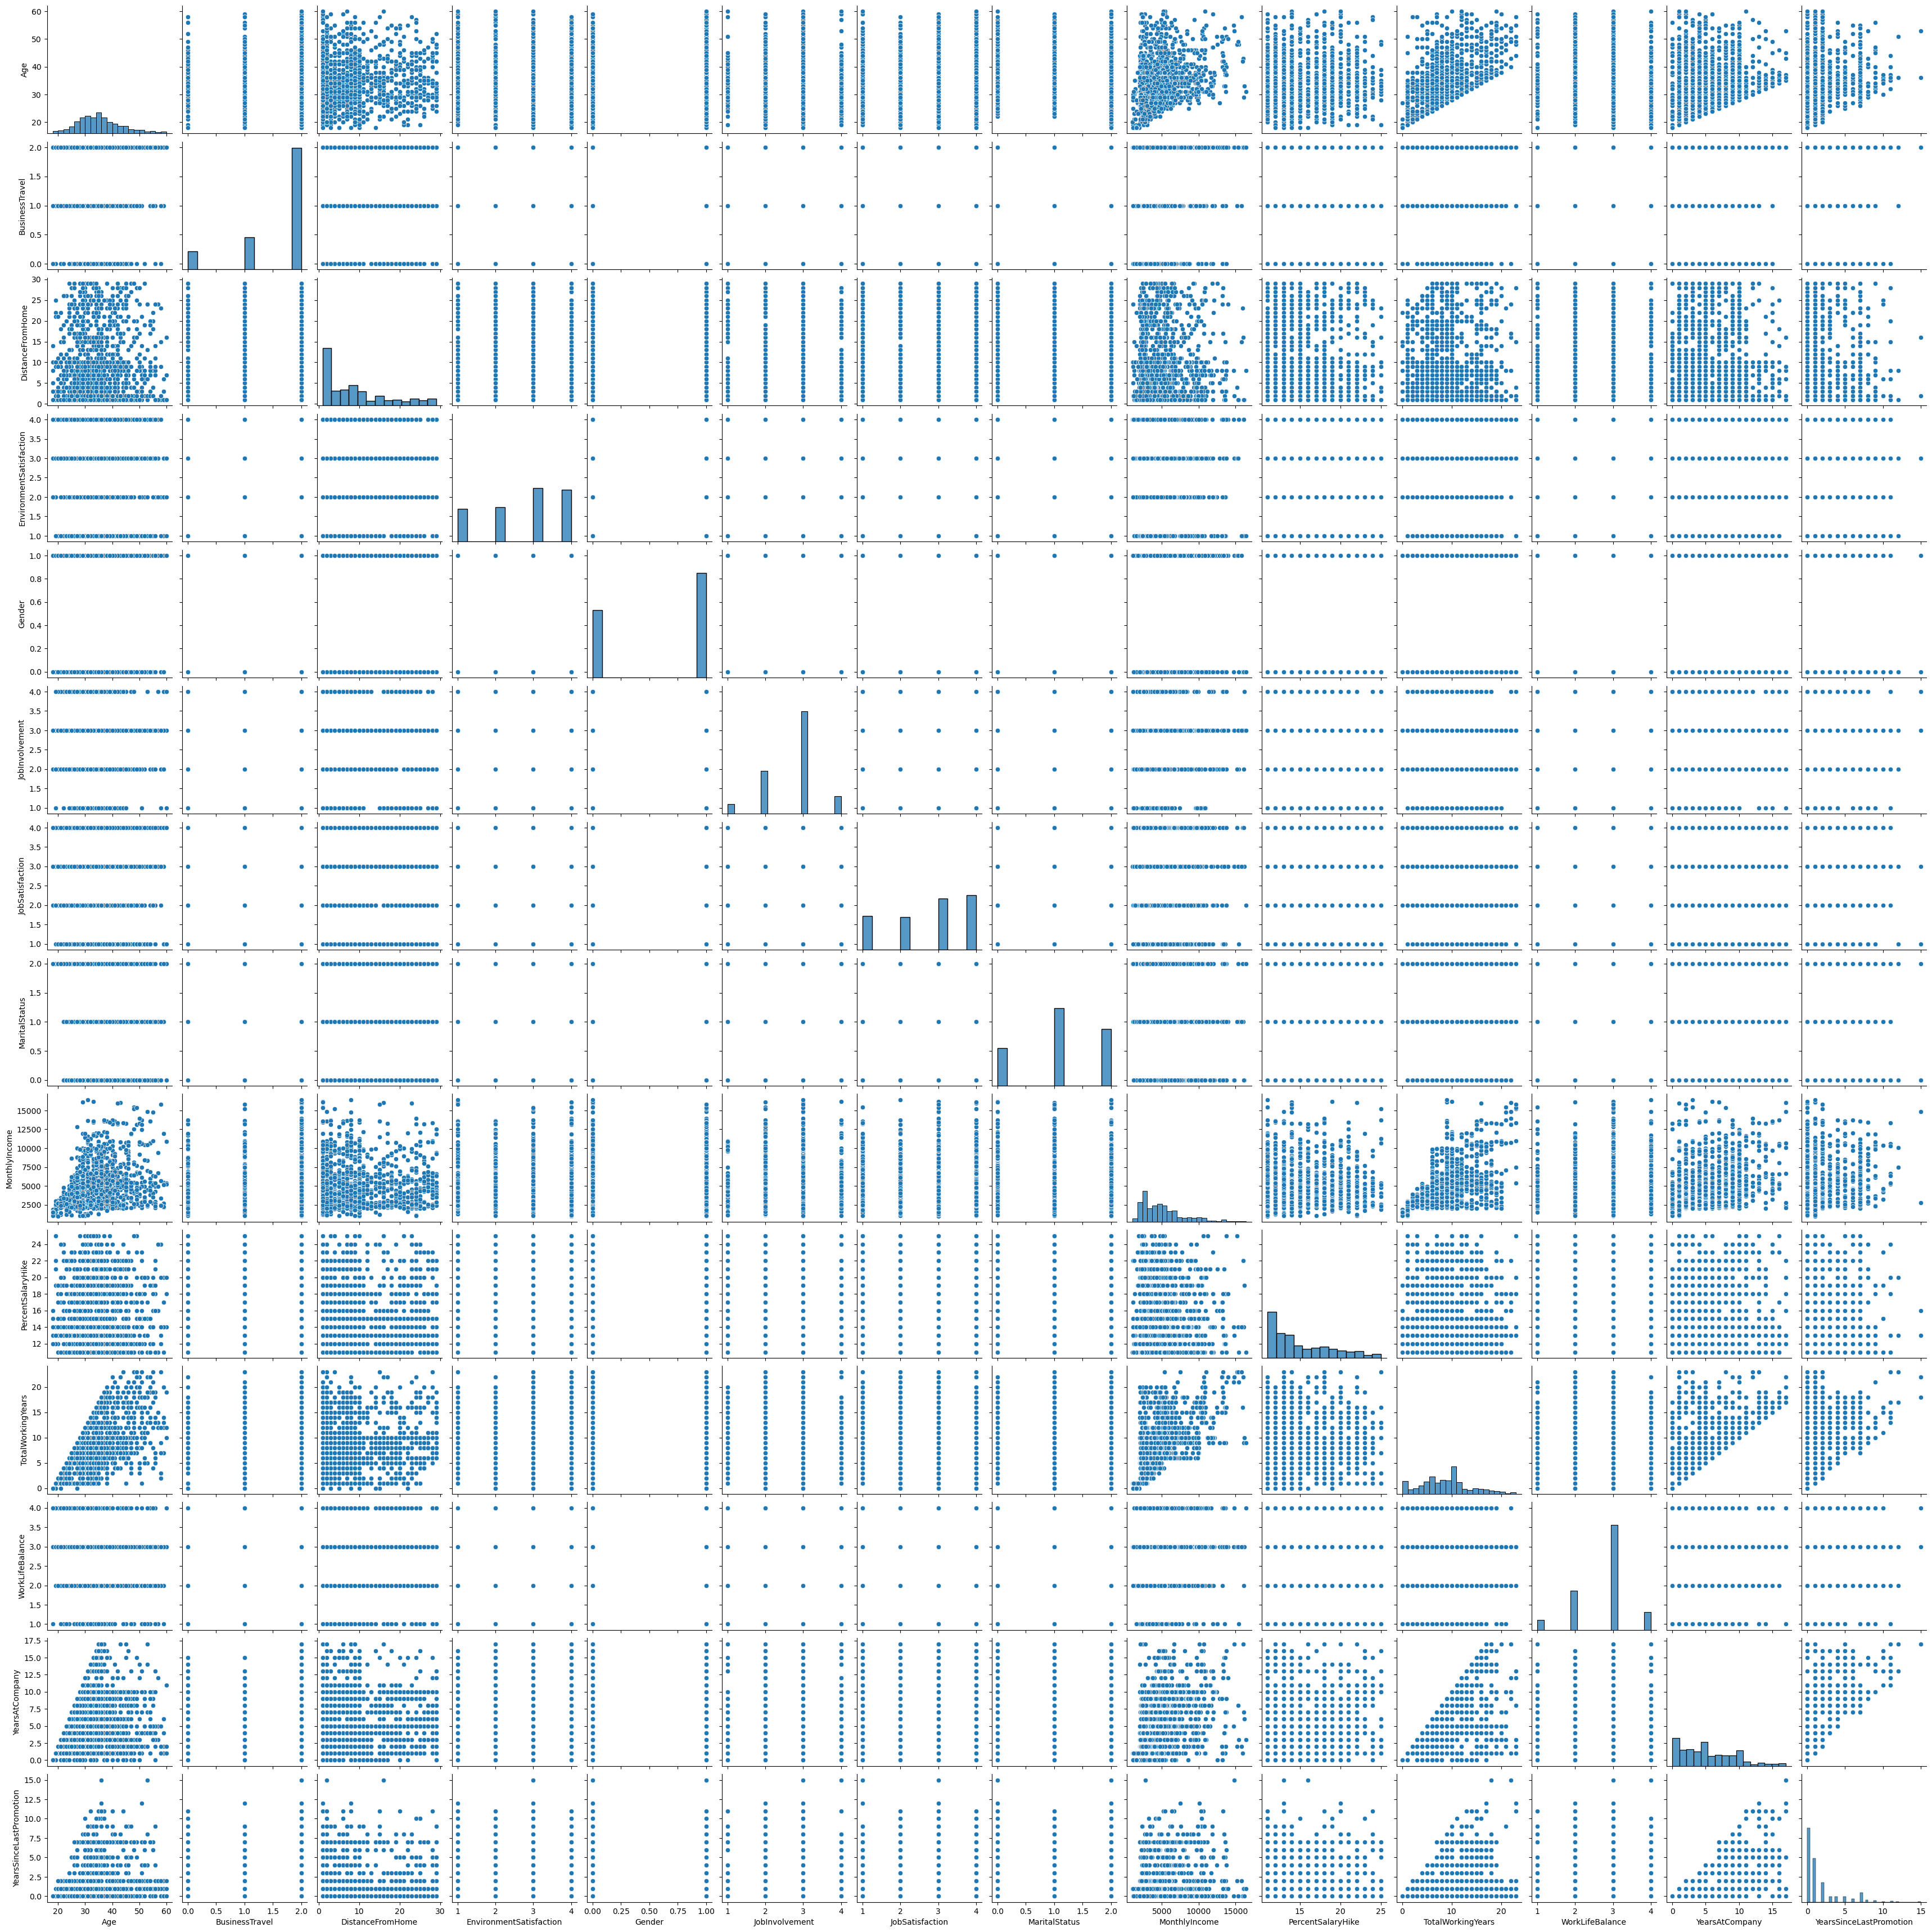

In [171]:
sns.pairplot(data)

## Splitting data into Features and Target

In [173]:
x=data.drop("Attrition",axis=1)
y=data["Attrition"]

## Hyperparameter tuning

In [ ]:
model_params = {
    "gbc": {
        "model": GradientBoostingClassifier(),
        "params": {
            'n_estimators': [500, 600, 700, 800, 900],
            'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7],
            'max_depth': [3, 4, 5, 6, 7],
            'min_samples_split': [100, 200, 500, 800],
            'min_samples_leaf': [3, 5, 10, 15, 20],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    "rf": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 6],
            'max_features': ['auto', 'sqrt', 'log2'],
            'bootstrap': [True, False]
        }
    },
    "knn": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 10, 15, 20],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50],
            'p': [1, 2]
        }
    },
    "dt": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [None, 3, 5, 7, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 6],
            'max_features': [None, 'auto', 'sqrt', 'log2'],
            'criterion': ['gini', 'entropy']
        }
    },
    "svc": {
        "model": SVC(),
        "params": {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4, 5],
            'gamma': ['scale', 'auto'],
            'coef0': [0.0, 0.1, 0.5, 1.0],
            'probability': [True, False]
        }
    }
}

In [ ]:
scores=[]
model_list =["gbc","rf","knn","dt","svc"]
for model_name in model_list: 
    model_info=model_params[model_name]
    gscv = GridSearchCV(model_info["model"],model_info["params"],cv=5)
    gscv.fit(x,y)
    scores.append({"model":model_name,"best_score":gscv.best_score_,
                  "best_params":gscv.best_params_})

In [ ]:
df = pd.DataFrame(scores)
df

## Splitting data into training and testing sets

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

In [187]:
Counter(y_train)

Counter({'No': 831, 'Yes': 174})

In [189]:
smt = SMOTE()
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)
Counter(y_train_smt)

Counter({'No': 831, 'Yes': 831})

## Training the model

In [244]:
model = GradientBoostingClassifier(learning_rate= 0.5,
 max_depth=20,
 max_features= 'sqrt',
 min_samples_leaf= 5,
 min_samples_split= 300,
 n_estimators= 800,
 subsample= 1.0)


model.fit(x_train_smt,y_train_smt)

GradientBoostingClassifier(learning_rate=0.5, max_depth=20, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=300,
                           n_estimators=800)

## Training score

In [196]:
model.score(x_train_smt,y_train_smt)

1.0

## Testing score

In [246]:
model.score(x_test,y_test)

0.7698412698412699

In [200]:
y_pred = model.predict(x_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [208]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[180  23]
 [ 30  19]]


In [210]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.89      0.87       203
         Yes       0.45      0.39      0.42        49

    accuracy                           0.79       252
   macro avg       0.65      0.64      0.64       252
weighted avg       0.78      0.79      0.78       252



In [ ]:
file_name = "savedmodel98.sav"
pickle.dump(model,open(file_name,"wb"))